In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import qiime2
from skbio import TreeNode
from biom import load_table
%matplotlib inline

In [8]:
#mapping = pd.read_table('../results/coded_regression_map_5k.txt', index_col=0)
mapping = pd.read_table('../data/ag_map_with_alpha.txt', index_col=0)
table = load_table('../data/deblur_125nt_no_blooms.biom')
balances = -1* pd.read_csv('../results/trimmed_balances.csv', index_col=0)
taxa = pd.read_table('../results/taxa.txt', index_col=0)
#pvalues = pd.read_csv('../results/pvalues.csv', index_col=0)
tree = qiime2.Artifact.load('../results/deblur_125nt_no_blooms_rare.biom.tree.nwk.qza').view(TreeNode)

/Users/mortonjt/miniconda3/envs/gneiss_env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#otu_filter = lambda val, id_, md: val.sum() > 10
#sparse_filter = lambda val, id_, md: (val>0).sum() > 10
#sample_filter = lambda val, id_, md: val.sum() > 5000

table.filter(otu_filter, axis='observation')
table.filter(sparse_filter, axis='observation')
table.filter(sample_filter, axis='sample')

7723 x 7676 <class 'biom.table.Table'> with 1523256 nonzero entries (2% dense)

In [10]:
table = pd.DataFrame(np.array(table.matrix_data.todense()).T, 
                     index=table.ids(axis='sample'),
                     columns=table.ids(axis='observation'))

In [11]:
taxa = pd.DataFrame(list(taxa.apply(lambda x: x['taxonomy'].split(';'), axis=1)), 
                    columns=['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'],
                    index=taxa.index)

In [12]:
from gneiss.util import match_tips
table, tree = match_tips(table, tree)

In [16]:
tree.find('y2').children[NUMERATOR]

<TreeNode, name: y4, internal node count: 6351, tips count: 6353>

In [17]:
from gneiss.util import NUMERATOR, DENOMINATOR

balance_summary = pd.concat((taxa.loc[tree.find('y2').children[NUMERATOR].subset()],
                             taxa.loc[tree.find('y2').children[DENOMINATOR].subset()]))
def position(x):
    if (x in tree.find('y2').children[NUMERATOR].subset()):
        return 'denominator'
    else:
        return 'numerator'

balance_summary['balance'] = 'y2'
balance_summary['position'] = list(map(position, balance_summary.index))
balance_summary.to_csv('country_balance_summary.csv')

/Users/mortonjt/miniconda3/envs/gneiss_env/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


KeyError: 'United Kingdom'

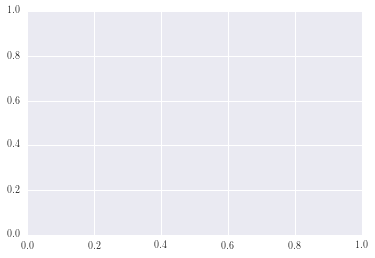

In [8]:
from gneiss.plot import balance_boxplot, balance_barplots

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

fig, ax = plt.subplots()
data = pd.merge(mapping, balances.T, left_index=True, right_index=True)
data['y2_y'] = -1*data['y2']

sns.boxplot(x='country', y='y2_y', data=data, notch=True, vert=False,  ax=ax,
            palette={'United States': '#b22637',
                     : '#224191',
                     2: '#fffef3'
                    })
# #16295b blue United Kingdom
# #224191 blue United Kingdom
# #b22637 red  United States
ax.set_yticklabels(['United States', 'United Kingdom', 'Canada'])
ax.set_xlabel(r'$\ln \big(\frac{\textrm{Relative Abundance Clostridiales}}{\textrm{Total Relative Abundance Remaining} }\big)$', fontsize=16)
plt.tight_layout()

plt.savefig('country.pdf')

In [ ]:
len(list(tree.find('y2').children[0].subset()))

In [9]:
taxa.loc[tree.find('y2').children[0].subset()]

,kingdom,phylum,class,order,family,genus,species
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGAGAAGCAAGTCAGAAGTGAAATCCATGGGCTTAACCCATGAACTGCTTTTGAAACTGTTTCCCTTGAGTA,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGAATGCAAGTCAGATGTGAAATCCATGGGCTTAACCCATGAACTGCATTTGAAACTGTATTTCTTGAGTA,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Oscillospira,s__
TACGTAGGGGGCGAGCGTTGTCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTTGGATGTGAAATACCCGGGCTTAACTTGGGGGCTGCATCCAATACTGTCGGACTTGAGTG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Christensenellaceae,g__,s__
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGAGGGCAAGTCAGATGTGAAATCCACGGGCTCAACTCGTGAACTGCATTTGAAACTACTCTTCTTGAGTA,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
TACGTAGGTTGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGAGATGCAAGTTGGGAGTGAAATCCATGGGCTCAACCCATGAACTGCTCTCAAAACTGTATCCCTTGAGTA,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
TACGTAGGGGGCAAGCGTTGTCCGGAATAATTGGGCGTAAAGGGCGCGTAGGCGGCTCGGTAAGTCTGGAGTGAAAGTCCTGCTTTTAAGGTGGGAATTGCTTTGGATACTGTCGGGCTTGAGTG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGAGAGCAAGTCAGAAGTGAAATCTATGGGCTTAACCCATAAACTGCTTTTGAAACTGTTCTTCTTGAGTA,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
TACGTAGGTGGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGCAGGCAAGTCAGGCGTGAAATATATCGGCTCAACCGGTAACGGCGCTTGAAACTGCAGGTCTTGAGTGA,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__
CACCGGCAGCTCTAGTGGTAGCAGTTTTTATTGGGCCTAAAGCGTCCGTAGCCGGTTTAATAAGTCTCTGGTGAAATCCTGCAGCTTAACTGTGGGAATTGCTGGAGATACTATTAGACTTGAGA,k__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter,s__
TACGTAGGTGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGGATACAAGTCAGATGTGAAATCTATGGGCTTAACCCATAAACTGCATTTGAAACTGTATCTCTTGAGTG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__,s__


In [ ]:
from gneiss.util import NUMERATOR, DENOMINATOR
taxa.loc[tree.find('y2').children[NUMERATOR].subset()].to_csv('y2_numerator.csv')
taxa.loc[tree.find('y2').children[DENOMINATOR].subset()].to_csv('y2_denominator.csv')

In [ ]:
from gneiss.plot import balance_boxplot, balance_barplots
data = pd.merge(mapping, balances.T, left_index=True, right_index=True)

In [ ]:
tree.find('y310').children

In [ ]:
taxa.loc[tree.find('y310').subset()]

In [ ]:
mapping = mapping.loc[mapping['sex'] != 'Unspecified']
mapping = mapping.loc[mapping['sex'] != 'other']

In [126]:
seqs = list(table.columns)

In [127]:
table.columns = np.arange(len(table.columns))

In [131]:
data_otu = pd.merge(mapping, table, left_index=True, right_index=True)

(0, 20)

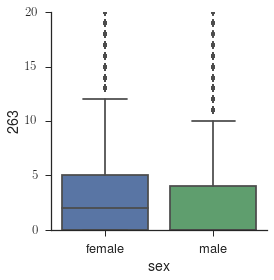

In [138]:
i = seqs.index('TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGCTGGCAAGTCAGGCGTGAAATCCCAGGGCTCAACCCTGGAACTGCGTTTGAAACTGCTGGTCTTGAGTA')
_ = sns.factorplot(x='sex',y=i, data=data_otu, kind='box')
plt.ylim([0, 20])

In [12]:
taxa.loc['TACGTAGGGGGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGTGCGTAGGTGGTAACTTAAGCGCGGGGTTTAAGGCAATGGCTTAACCATTGTTCGCCCTGCGAACTGGGATACTTGAGTGC']

kingdom              k__Bacteria
phylum             p__Firmicutes
class              c__Clostridia
order           o__Clostridiales
family     f__[Mogibacteriaceae]
genus                        g__
species                      s__
Name: TACGTAGGGGGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGTGCGTAGGTGGTAACTTAAGCGCGGGGTTTAAGGCAATGGCTTAACCATTGTTCGCCCTGCGAACTGGGATACTTGAGTGC, dtype: object

In [13]:
tree.find('y309').children[0].subset()

frozenset({'TACGTAGGGGGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGTGCGTAGGTGGTAACTTAAGCGCGGGGTTTAAGGCAATGGCTTAACCATTGTTCGCCCTGCGAACTGGGATACTTGAGTGC',
           'TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGCTGGCAAGTCAGGCGTGAAATCCCAGGGCTCAACCCTGGAACTGCGTTTGAAACTGCTGGTCTTGAGTA'})

In [14]:
NUMERATOR, DENOMINATOR = 1, 0
taxa.loc[tree.find('y309').children[NUMERATOR].subset()].to_csv('y309_numerator.csv')
taxa.loc[tree.find('y309').children[DENOMINATOR].subset()].to_csv('y309_denominator.csv')

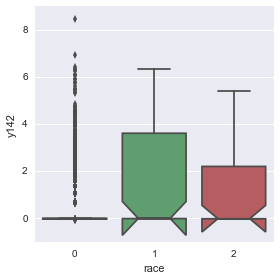

In [15]:
from gneiss.plot import balance_boxplot, balance_barplots
data = pd.merge(mapping, balances.T, left_index=True, right_index=True)
sns.factorplot(x='race', y='y142', data=data, kind='box', notch=True)

Bifidobacterium tsurumiense : commonly found in dental plaques

In [16]:
x = tree.find('y142').children[DENOMINATOR]

taxa.loc[tree.find('y142').children[NUMERATOR].subset()].to_csv('y142_numerator.csv')
pd.DataFrame({x.name: taxa.loc[x.name]}).to_csv('y142_denominator.csv')

In [17]:
data.groupby("ibd").mean().y1417

ibd
0   -0.000446
1   -0.003976
2    0.343279
Name: y1417, dtype: float64

In [18]:
data.groupby("ibd").std().y1417

ibd
0    0.088378
1    0.002606
2    1.044322
Name: y1417, dtype: float64

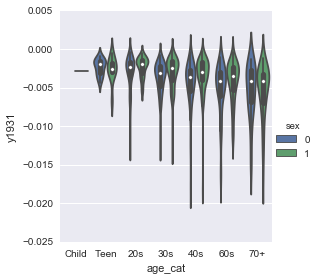

In [19]:
from gneiss.plot import balance_boxplot, balance_barplots
data = pd.merge(mapping, balances.T, left_index=True, right_index=True)
sns.factorplot(x='age_cat', hue='sex', y='y1931', data=data, kind='violin', notch=True, 
               order=['Child', 'Teen', '20s', '30s', '40s', '60s', '70+'])

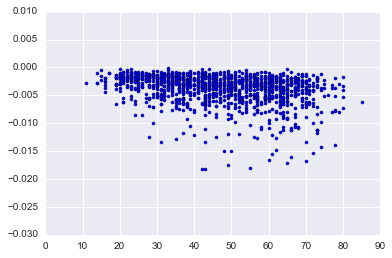

In [20]:
data_0 = data.loc[mapping.sex==0]
data_1 = data.loc[mapping.sex==1]
plt.scatter(data_0.age_corrected, data_0.y1931, s=10)
plt.scatter(data_1.age_corrected, data_1.y1931, s=10)

In [21]:
x

<TreeNode, name: TACGTAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTCGTCGCGTCCGGTGTGAAAGTCCATCGCTTAACGGTGGATCTGCGCCGGGTACGGGCGGGCTGGAGTG, internal node count: 0, tips count: 0>

In [22]:
x = tree.find('y1931').children[DENOMINATOR]

taxa.loc[tree.find('y1931').children[NUMERATOR].subset()].to_csv('y1931_numerator.csv')
pd.DataFrame({x.name: taxa.loc[x.name]}).T.to_csv('y1931_denominator.csv')

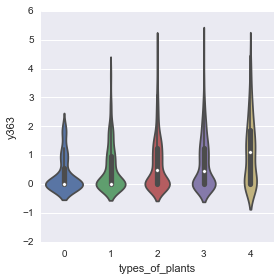

In [23]:
from gneiss.plot import balance_boxplot, balance_barplots
data = pd.merge(mapping, balances.T, left_index=True, right_index=True)
sns.factorplot(x='types_of_plants', y='y363', data=data, kind='violin', notch=True)

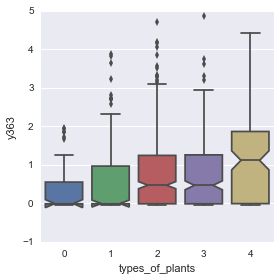

In [24]:
from gneiss.plot import balance_boxplot, balance_barplots
data = pd.merge(mapping, balances.T, left_index=True, right_index=True)
sns.factorplot(x='types_of_plants', y='y363', data=data, kind='box', notch=True)

In [25]:
subset_pvalues = pvalues.loc[balances.index]
subset_pvalues.apply(np.argmin, axis=0)

NameError: name 'pvalues' is not defined

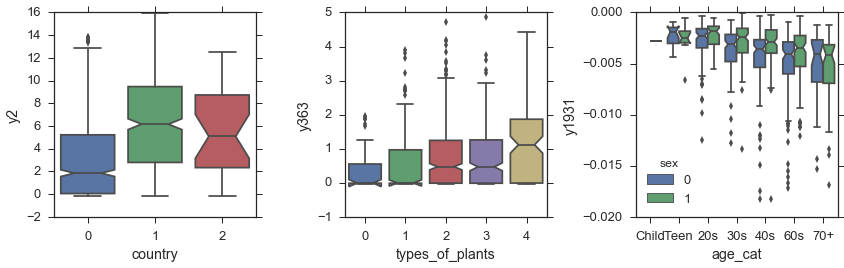

In [26]:
sns.set(font_scale=1.3) 
sns.set_style('ticks')

data = pd.merge(mapping, balances.T, left_index=True, right_index=True)
f, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x='country', y='y2', data=data, notch=True, ax=axes[0])

sns.boxplot(x='types_of_plants', y='y363', data=data, notch=True, ax=axes[1])

sns.boxplot(x='age_cat', hue='sex', y='y1931', data=data, notch=True, 
               ax=axes[2], order=['Child', 'Teen', '20s', '30s', '40s', '60s', '70+'])
f.tight_layout()
f.savefig('../results/country_plants_age_balances.pdf')

In [27]:
taxa.loc[tree.find('y1931').children[DENOMINATOR].name]

kingdom               k__Bacteria
phylum          p__Proteobacteria
class      c__Gammaproteobacteria
order          o__Pseudomonadales
family           f__Moraxellaceae
genus            g__Acinetobacter
species                       s__
Name: TACAGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGCCAATTAAGTCAAATGTGAAATCCCCGAGCTTAACTTGGGAATTGCATTCGATACTGGTTGGCTAGAGTA, dtype: object

In [30]:
tree.find('y2').children[DENOMINATOR]

<TreeNode, name: y3, internal node count: 14, tips count: 16>

In [29]:

balances = ['y2', 'y363', 'y1931']
varz = ['C(country)[T.1.0]', 'types_of_plants', 'ln_age', 'C(sex)[T.1.0]', 'ln_age:C(sex)[T.1.0]']
pvalues.loc[balances, varz]

NameError: name 'pvalues' is not defined

In [ ]:
pvalues.loc['y2']